# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [5]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator

# Start from a simple document
r = requests .get('http://eecs.utk.edu')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

class="menu-item	54
<div	54
menu-item-object-page	45
menu-item-type-post_type	45
of	39
</div>	38
<td	36
</td>	35
<li><a	35
class="eventless">	28
<link	25
<script	24
/>	21
</ul>	21


### Part 2

Given the earlier code, i was able to output the given word frequencies between 2 different authors

In [2]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/files/11/11-0.txt') # alice wonderland
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/files/55/55-0.txt') # wonderful oz

[('know', 61), ('queen', 64), ('see', 65), ('would', 72), ('thought', 73), ('could', 75), ('like', 78), ('went', 83), ('one', 88), ('project', 88), ('', 92), ('â\x80\x9ci', 119), ('little', 124), ('alice', 374), ('said', 455)]
[('would', 113), ('asked', 114), ('could', 119), ('witch', 119), ('one', 120), ('little', 139), ('tin', 139), ('great', 142), ('â\x80\x9ci', 143), ('oz', 146), ('lion', 169), ('woodman', 175), ('scarecrow', 215), ('said', 331), ('dorothy', 340)]


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


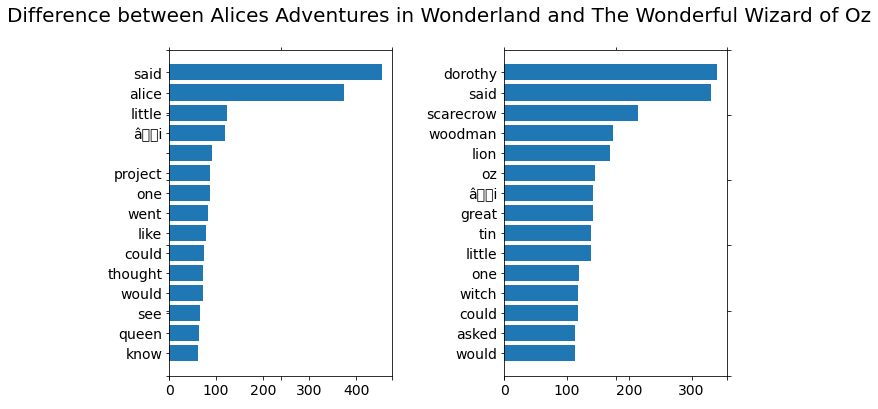

In [3]:
# Plot the results: there are noticeable differences in the recipes!
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots
    # First subplot
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    # Second subplot
    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

    print (wf_ee)
    print (wf_bu)

plotTwoLists (wf_ee, wf_bu, 'Difference between Alices Adventures in Wonderland and The Wonderful Wizard of Oz')

In [9]:
#In case Project gutenberg is blocked you can download text to your laptop and copy to the docker container via scp
#Assuming the file name you copy is pg4680.txt here is how you change the script
# Please note the option errors='replace'
# without it python invariably runs into unicode errors
f = open ('pg4680.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP stuff, get just the body of the response
t = f.read()

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

and	2836
of	2676
to	2646
a	2217
in	1422
his	1205
he	928
that	920
was	823
for	798
with	797
as	672
I	505
you	497


# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

Part 1 Comapring freq of words of two different works by the same author.

In this assignment i changed how the txt was read in making it a file instead of an html source. 
I then used the above given code to help split and sort the words and then print them accordingly 
in a list to better show the works provided.

In [11]:
import re, operator
#open txt doc instead of html source
f = open ('11-0.txt', 'r', encoding="ascii", errors='replace')
f2 = open ('48795.txt', 'r', encoding="ascii", errors='replace')
    
t = f.read()
t2 = f2.read()

wds = re.split('\s+',t)
wds2 = re.split('\s+',t2)

wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
        
wf2 = {}
for w in wds2:
    if w in wf2: wf2 [w] = wf2 [w] + 1
    else:  wf2 [w] = 1
     
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
wfs2 = sorted (wf2 .items(), key = operator .itemgetter (1), reverse=True)  

 
ml = min(len(wfs),15)
print ("Alices Adventures in Wonderland\n")
for i in range(1,ml,1):
    print (wfs[i][0] + "\t" + str (wfs[i][1])) 
    
print('\nSylvie and Bruno Concluded\n')    
ml2 = min(len(wfs2),15)
for i in range(1,ml2,1):
    print (wfs2[i][0] + "\t" + str (wfs2[i][1])) 

Alices Adventures in Wonderland

and	783
to	778
a	667
of	605
she	485
said	416
in	406
it	357
was	329
you	306
I	249
as	246
that	225
Alice	221

Sylvie and Bruno Concluded

to	2024
of	1828
a	1657
and	1559
I	1155
in	1005
it	769
he	726
that	682
was	643
is	576
with	564
as	560
you	551


### Part 3
Are there some words preferred by one author but used less frequently by another author?

Yes, pertaining to the story, certain character names are decribed way more often. These being dorothy, (from wizard of oz) along with the other main characters. Scarecrow, Lion, Tin Man. And Alice of course was name dominately in alices adventures in wonderland. 